In [2]:
import pandas as pd

In [6]:
data = pd.read_csv( 'C:/Users/PICHAU/Desktop/AnaliseDeDados/DataAnalysis/datasets/kc_house_data.csv' )

# Primeiro contato com .groupby

In [10]:
# Quantos imoveis existem por numero de quartos
    # forma de fazer nao inteligente, ja que tem como ter tantos tipos distintos 
    # que nao vai ser possivel fazer isso
print(data[data[['bedrooms']]['bedrooms'] == 0].shape)
print(data[data[['bedrooms']]['bedrooms'] == 1].shape)
print(data[data[['bedrooms']]['bedrooms'] == 2].shape)
print(data[data[['bedrooms']]['bedrooms'] == 3].shape)
print(data[data[['bedrooms']]['bedrooms'] == 4].shape)

(13, 21)
(199, 21)
(2760, 21)
(9824, 21)
(6882, 21)


In [5]:
# esse metodo .goupby é para justamnente fazer o qeu estavamos querendo
 # contar quantos apartamentos tem em cada quantidade de quartos

data[['id','bedrooms']].groupby( 'bedrooms' ).size()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64

In [6]:
df_grouped = data[['bedrooms']].groupby( 'bedrooms' )

In [7]:
# Como ir printando mais bonito na tela a nossas ideia acima

for bedrooms, frame in df_grouped :

    print( 'numero de quartos: {}'.format( bedrooms ) )
    print( frame.shape, end='\n\n')

numero de quartos: 0
(13, 1)

numero de quartos: 1
(199, 1)

numero de quartos: 2
(2760, 1)

numero de quartos: 3
(9824, 1)

numero de quartos: 4
(6882, 1)

numero de quartos: 5
(1601, 1)

numero de quartos: 6
(272, 1)

numero de quartos: 7
(38, 1)

numero de quartos: 8
(13, 1)

numero de quartos: 9
(6, 1)

numero de quartos: 10
(3, 1)

numero de quartos: 11
(1, 1)

numero de quartos: 33
(1, 1)



In [8]:
 for bedrooms, frame in df_grouped :
    print( 'numero de quartos: {}'.format( bedrooms ) )
    print( frame.head(4), end='\n\n' )

numero de quartos: 0
      bedrooms
875          0
3119         0
3467         0
4868         0

numero de quartos: 1
     bedrooms
154         1
264         1
350         1
465         1

numero de quartos: 2
    bedrooms
2          2
11         2
18         2
23         2

numero de quartos: 3
   bedrooms
0         3
1         3
4         3
6         3

numero de quartos: 4
    bedrooms
3          4
5          4
15         4
17         4

numero de quartos: 5
    bedrooms
14         5
22         5
42         5
51         5

numero de quartos: 6
     bedrooms
209         6
232         6
239         6
331         6

numero de quartos: 7
      bedrooms
556          7
1135         7
1241         7
3721         7

numero de quartos: 8
      bedrooms
1660         8
4035         8
4067         8
6174         8

numero de quartos: 9
      bedrooms
4096         9
4235         9
6079         9
8546         9

numero de quartos: 10
       bedrooms
13314        10
15161        10
19254        10

# Respondendo as perguntas do CEO

   ## Qual o numero de imoveis por ano de construçao?


In [9]:
# Sempre ter em mente duas coisas, quem é operador e quem é o filtro( nesse caso é o imoveis e ano de construçao ) )
data[['id','yr_built']].groupby( 'yr_built' ).count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


## Qual o menor numero de quartos por ano de construçao dos imoveis?

In [10]:
# Agora o operador é bedrooms e filtro é o ano denovo
data[['bedrooms','yr_built']].groupby( 'yr_built' ).min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


## Qual o preço de compra mais alto por cada numero de quarto?

In [11]:
data[['price','bedrooms']].groupby( 'bedrooms' ).max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


## Qual a soma de todos os preços  de compra por numero de quartos?

In [12]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data[['price','bedrooms']].groupby( 'bedrooms' ).sum()

,price
bedrooms,
0,5323550.00
1,63210934.00
2,1107788602.00
3,4580263939.00
4,4372957028.00
5,1259346326.00
6,224541613.00
7,36145017.00
8,14366000.00


## Qual a soma de todos os preços de compra por numero de quartos e banheiros?

In [13]:
data[['price','bedrooms','bathrooms']].groupby( ['bedrooms','bathrooms'] ).sum()

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

## Qual o tamanho medio das salas dos imoveis por ano de construçao?

In [14]:
data[['sqft_living','yr_built']].groupby( 'yr_built' ).mean()

,sqft_living
yr_built,
1900,1732.01
1901,1763.62
1902,1919.63
1903,1507.74
1904,1603.18
...,...
2011,2313.68
2012,2378.74
2013,2636.59


## Qual o tamanho mediano(mediana) das salas dos imoveis por ano de construçao?

In [15]:
data[['sqft_living','yr_built']].groupby( 'yr_built' ).median()

,sqft_living
yr_built,
1900,1540.00
1901,1610.00
1902,1600.00
1903,1505.00
1904,1280.00
...,...
2011,2270.00
2012,2237.50
2013,2580.00


## Qual o desvio-padrao do tamanho das salas dos imoveis por ano de construçao( o quao meus dados estao espalhados da media )?

In [16]:
data[['sqft_living','yr_built']].groupby( 'yr_built' ).std()

,sqft_living
yr_built,
1900,732.94
1901,668.23
1902,878.66
1903,469.72
1904,1076.87
...,...
2011,804.86
2012,771.43
2013,883.50


## Como é o crescimento medio de preços de compras dos imoveis, por ano, por dia, pela semana do ano?

<BarContainer object of 2 artists>

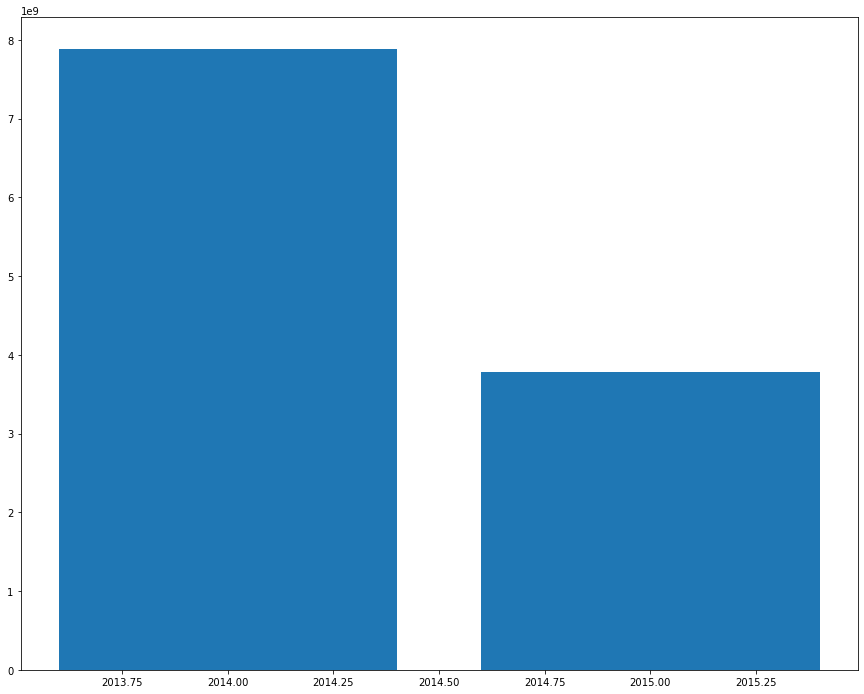

In [17]:
# Crescimento total de preços de compras dos imoveis por ano
# eixo x: Anos
# eixo y: Soma dos Precos

from matplotlib import pyplot as plt

# Primeiro grafico

data['year'] = pd.to_datetime( data['date'] ).dt.year 
by_year = data[['price','year']].groupby( 'year' ).sum().reset_index() # o reset é para ficar sem o year ser um index e sim uma coluna como o price

plt.figure( figsize=(15,12) )
plt.bar( by_year['year'], by_year['price'] )




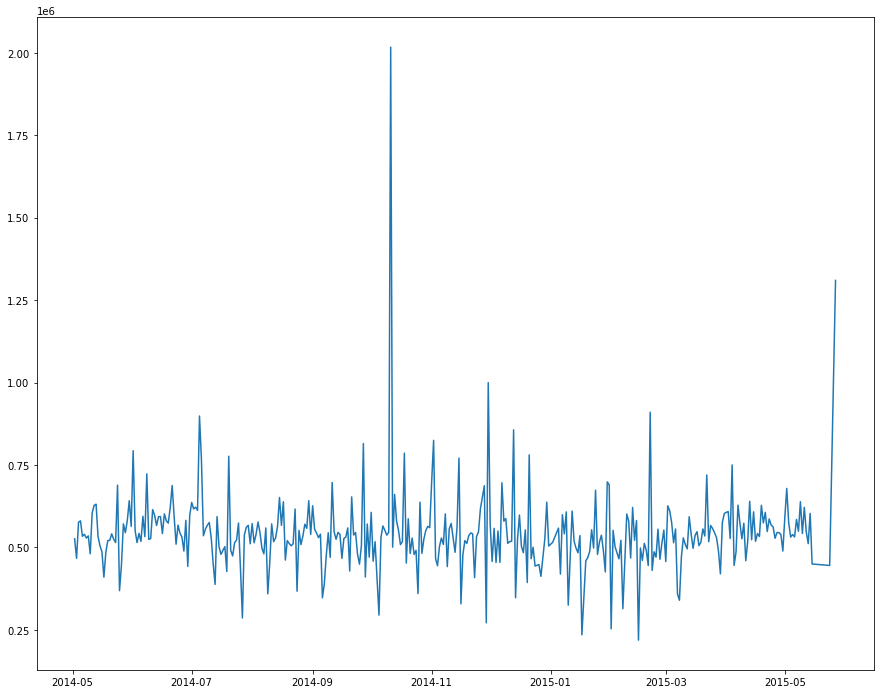

In [55]:
# Segundo Grafico

data['day'] = pd.to_datetime( data['date'] ) 
by_day = data[['price','day']].groupby( 'day' ).mean().reset_index() # o reset é para ficar sem o year ser um index e sim uma coluna como o price

plt.figure( figsize=(15,12) )
plt.plot( by_day['day'], by_day['price'] )


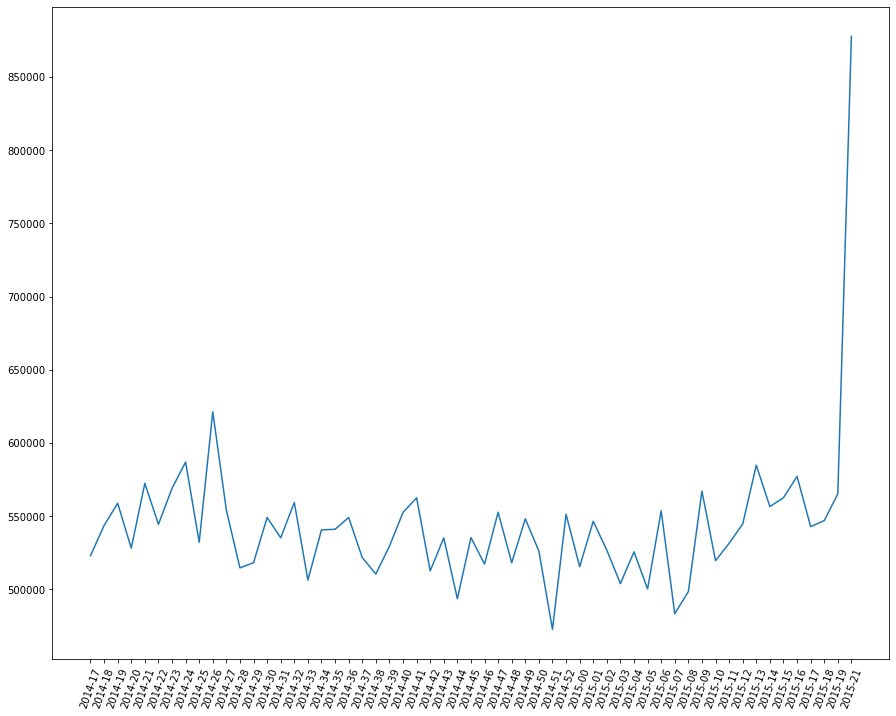

In [18]:
# terceito Grafico
data['year_week'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%U' ) # %U é para a semana começar no domingo
by_week_year = data[['price','year_week']].groupby( 'year_week' ).mean().reset_index() # o reset é para ficar sem o year ser um index e sim uma coluna como o price

plt.figure( figsize=(15,12) )
plt.plot( by_week_year['year_week'], by_week_year['price'] )
plt.xticks( rotation=70 ); # para rodar um pouco nossos indices do eixo x

* Esses graficos servem justamente para uma apresentaçao de uma ideia em um dashboard, ou seja, usamos dos graficos para falar de insights que tivemos na nossa analise qeu é fundamentada nos dados
* Temos a ferramenta PowerBi que é justmaente para o compartilhamento e criaçao de dashboards para apresentaçao de negocio

## Vamos agora fazer  um dashboard baseado nesses 3 graficos
* fica bem mais facil pegar esses graficos e fazer em uma ferramenta como o PowerBi nossa apresentaçao, mas por hora vamos fazer aqui pelo python
* pensamos em fazer um grid com 1 o grafico 1 e na 2 linha os dois outros graficos

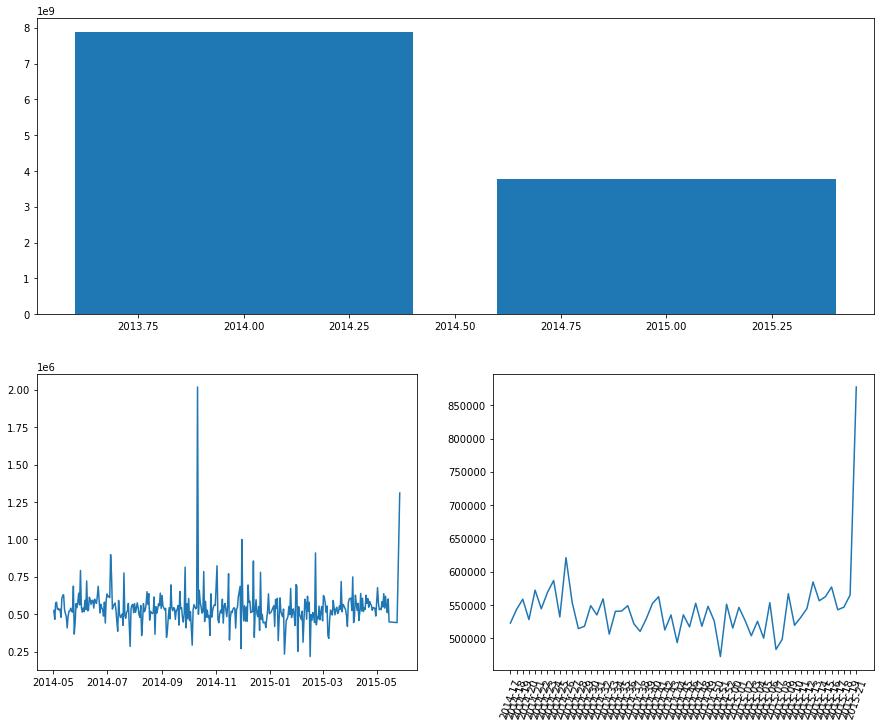

In [20]:
from matplotlib import gridspec

fig = plt.figure(  figsize=(15,12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )# quantass colunas meu grid, quantas linhas, e qual o tamanho das figuras

ax1 = fig.add_subplot( specs[0, :] ) # First row
ax2 = fig.add_subplot( specs[1, 0] ) # second row - first column
ax3 = fig.add_subplot( specs[1, 1] ) #second row - second column

# Primeiro grafico

data['year'] = pd.to_datetime( data['date'] ).dt.year 
by_year = data[['price','year']].groupby( 'year' ).sum().reset_index() # o reset é para ficar sem o year ser um index e sim uma coluna como o price
ax1.bar( by_year['year'], by_year['price'] )

# Segundo Grafico

data['day'] = pd.to_datetime( data['date'] ) 
by_day = data[['price','day']].groupby( 'day' ).mean().reset_index() # o reset é para ficar sem o year ser um index e sim uma coluna como o price
ax2.plot( by_day['day'], by_day['price'] )

# terceito Grafico
data['year_week'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%U' ) # %U é para a semana começar no domingo
by_week_year = data[['price','year_week']].groupby( 'year_week' ).mean().reset_index() # o reset é para ficar sem o year ser um index e sim uma coluna como o price
ax3.plot( by_week_year['year_week'], by_week_year['price'] )
plt.xticks( rotation=70 );

## Alterar o mapa da aula passada para conseguir identificar as casas com maior preço

In [30]:
import plotly.express as px

houses = data[['id','lat','long','price']]

fig = px.scatter_mapbox( houses,
                         lat = 'lat',
                         lon = 'long',
                         size = 'price',
                         size_max = 17,
                         zoom = 10)
fig.update_layout( mapbox_style = 'open-street-map' )
fig.update_layout( height = 600, margin = {'r': 0, 't': 0,'l':0,'b':0} )
fig.show()